In [1]:
import pandas as pd

%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)

In [4]:
%%time
tweets = pd.read_csv('../data/csvs/tweets.csv', encoding='utf8')

CPU times: user 3.95 s, sys: 176 ms, total: 4.13 s
Wall time: 4.16 s


In [5]:
%%time
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format="%a %b %d %H:%M:%S +0000 %Y")

CPU times: user 6.64 s, sys: 18.7 ms, total: 6.66 s
Wall time: 6.66 s


In [6]:
tweets_no = tweets[tweets.posicion == 'no']
len(tweets_no)

261130

In [7]:
tweets_si = tweets[tweets.posicion == 'si']
len(tweets_si)

780455

In [8]:
%%time
gb = tweets.groupby([tweets.created_at.dt.date, tweets.posicion])['created_at'].count()

CPU times: user 2.26 s, sys: 121 ms, total: 2.38 s
Wall time: 2.32 s


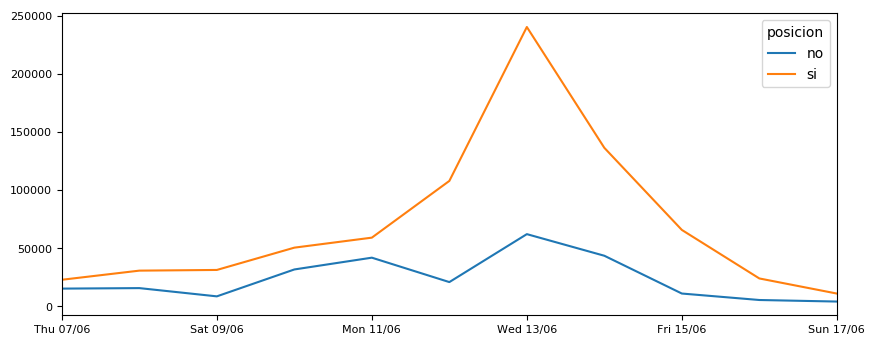

In [9]:
gb = gb.unstack()
gb.index = [d.strftime("%a %d/%m") for d in gb.index]
gb.plot(figsize=(10,4), fontsize=8)

## Tweets por hora

# Tweets más retuiteados

In [16]:
import re

### Sí

In [17]:
df = tweets_si[['retweet_count', 'full_text']]
# Removemos menciones en RTs
df.full_text = df.full_text.apply(lambda s: re.sub(r"^RT @\w+: ", "", s))
df = df.groupby('full_text').max()
df = df.sort_values(by='retweet_count', ascending=False).head(40)

### Para evitar duplicados, extendemos los tuits recortados

In [18]:
long_tweets = list(set(tweets[tweets.full_text.str.len() > 140].full_text.values))

len(long_tweets)

def extend_to_original(t):
    if len(t) > 140 or t[-1] != u'…':
        return t
    for l in long_tweets:
        if l.startswith(t[:-1]):
            return l
    return t

In [19]:
df['full_text'] = df.index
df.full_text = df.full_text.apply(extend_to_original)
df = df.groupby('full_text').max()
df.sort_values(by='retweet_count', ascending=False).head(20)

,retweet_count
full_text,
"Argentina, 1984. Argentina, 2018. Después de 3 décadas, ¡por fin Argentina hace historia! La cámara de diputados vota a favor de la despenalización del aborto. 💚💚💚💚💚💚💚💚 #AbortoSeraLey https://t.co/oqjv9XOQTb",43247
Se gritó como un gol de Messi. Emoción. #AbortoLegalYa https://t.co/mRQD3iKfW3,34647
Lo PERFECTO que habló Victoria Donda #QueSeaLey #AbortoLegalYa #AbortoSesionHistorica https://t.co/Fcy5XFj9SG,25152
"""estoy a favor de las 2 vidas, por eso es que voto a favor de la despenalización del aborto"" MIREN LA CARA DE LA DE ABAJ…",22970
"#AbortoLegalYa - sigan este hilo. NO SOY NEUTRAL. Mi nombre es Cecilia Ousset. Soy católica, médica, especialista en tocoginecología, madre de cuatros hijos. Trabajo actualmente en el Sistema de Salud privado, aunque me formé y trabajé en el Sistema Público en la Ciudad de Mza.",14641
"Argentina tiene que avanzar! El aborto existió siempre! Basta de muertes en la clandestinidad! Un país con mejor educación sexual, y leyes que protejan a sus ciudadanos, va a ser un mejor país! No retrocedamos! Avancemos! #AbortolegalYA #AbortoLegalOClandestino",14448
"En las calles, en lxs jóvenes, este debate ya está ganado💚 #ElFuturoYallego #AbortoSeraLey https://t.co/PAj9oJ7lnY",11764
"Si no llegamos nosotras, lo van a conseguir ellas. #AbortoLegalYa https://t.co/JqjJPkvyAK",11329
Se entiende? #AbortoLegalYa https://t.co/c8UOiE51VV,9587


### No

In [215]:
df = tweets_no[['retweet_count', 'full_text']]
df.full_text = df.full_text.apply(lambda s: re.sub(r"^RT @\w+: ", "", s))
df = df.groupby('full_text').max()
df = df.sort_values(by='retweet_count', ascending=False).head(40)

df['full_text'] = df.index
df.full_text = df.full_text.apply(extend_to_original)
df = df.groupby('full_text').max()
df.sort_values(by='retweet_count', ascending=False).head(20)

,retweet_count
full_text,
"#NoAlAborto En el aborto ""Seguro"", seguro alguien muere, ""Gratuito"" alguien lo paga y muy caro, ""Libre"" alguien no eligió, ""Leg…",5039
"APLAUSOS DE PIE para éstos médicos tucumanos que grabaron éste spot contra el ABORTO. ""Estudiamos para cuidar la vida de todos. Si estás pensando en nosotros para practicar abortos, NO CUENTEN CONMIGO"" 👏👏👏 RT que lo vean todos 🇦🇷 #SalvemosLas2Vidas #NoAlAborto #SiAlavida https://t.co/Vwd4etkRvt",2746
"Venimos de un país donde CFK perseguía y hostigaba a todo aquel que hablase mal de ella. MACRI, en cambio, invitó a los COCINEROS ARGENTINOS a Olivos, luego que ellos le cantaran MMLPQTP. #Cambiamos Hoy salió el programa grabado. Pasen y vean👇 #PorElMundo #ArgentinaEsProvida https://t.co/2MU5yGA1oY",2459
"¿Saben qué es lo mejor de los pro-vida? Que somos mayoría en Argentina sin recibir los millones de dólares que los abortistas han recibido de internacionales de la muerte, como Planned Parenthood, para llevar adelante su campaña mortífera #NoAlAbortoEnArgentina #SalvemosLas2Vidas",2235
"¿Saben qué es lo mejor de los pro-vida? Que somos mayoría en Argentina sin recibir los millones de dólares que los abortistas han recibido de internacionales de la muerte, como Planned Parenthood, para llevar adelante su campaña mortífera. #ArgentinaEsProvida",2144
Con Uma decimos: SI A LA VIDA #CuidemosLasDosVidas ❤️❤️ https://t.co/mGfDwWIIWO,2009
"Hasta el momento estos son los números: 127 diputados a favor de la vida, 123 a favor del genocidio, y todavía algunos que no se deciden entre la vida y el genocidio. #AbortoSesiónHistórica #SalvemosLas2Vidas",1976
"TOMA DE COLEGIOS: Una causa justa por un pañuelo, $100 y una vianda. -J: ""Nos dan los pañuelos gratis, $ 100 y una vianda para la noche"" - P: Quienes se los dan? - J: ""No puedo decirte"" - P: Ok, entiendo #QueElAbortoSeaLey #SalvemosLas2Vidas #ArgentinaEsProvida https://t.co/sJq5QAKcOe",1961
"Si el problema fueran las 30 mujeres q mueren anualmente en Argentina por abortos clandestinos, lo que debería pedirse son políticas públicas para desmantelar los centros abortistas clandestinos. El Estado bien podría reprimir este mal en lugar de permitirlo. #ArgentinaEsProvida",1901


## Léxico

In [116]:
import gensim

import re
def clean(s):
    s = gensim.utils.deaccent(s)
    s = s.strip().lower()
    s = s.replace("rt ", " ")

    # remove mentions
    s = re.sub(r"@\w+", " ", s)

    # remove URLs
    s = re.sub(r"https?://t\.co/\w+", " ", s)
    s = re.sub(
        r"https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        " ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"[^A-Za-z0-9ñ()\'\`#]", " ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)

    
    return s

In [185]:
from nltk.corpus import stopwords
def tokenize(s):
    return [t for t in s.strip().split() if (t not in stopwords.words('spanish')
                                             and len(t) > 1
                                             and t[0] != '#'
                                             and t != "si")]

In [230]:
def get_all_tokens(df_tweets):
    all_tokens = []
    for tuit in df_tweets.full_text.apply(clean).unique():
        all_tokens += tokenize(tuit) + ['.']
    return all_tokens

In [231]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### No

CPU times: user 3min 45s, sys: 8.37 s, total: 3min 54s
Wall time: 3min 54s


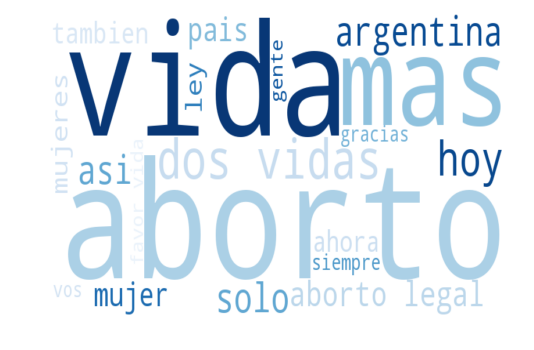

In [237]:
%%time
all_tokens = get_all_tokens(tweets_no)

wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

### Sí

CPU times: user 8min 40s, sys: 18.2 s, total: 8min 58s
Wall time: 8min 58s


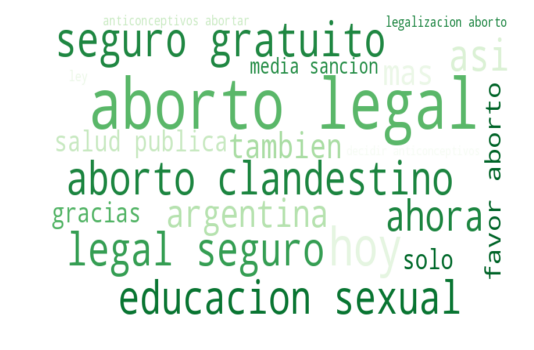

In [238]:
%%time
all_tokens = get_all_tokens(tweets_si)

wordcloud = WordCloud(normalize_plurals=False, colormap='Greens', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")